# **TALENTO TECH**
# **Proyecto Final**
## Grupo 2


<img src="https://cdn.simpleicons.org/python/000/fff" alt="Python" align=left width=24 height=24>

<img src="https://cdn.simpleicons.org/jupyter/000/fff" alt="jupyter" align=left width=24 height=24>
---

- Monica ...
- Juan Pablo ....
- Juan Pablo ....
- Hildebrando Vargas
- Jonathan Gutierrez
- Mary Luz Ceballos


## Tareas
1. Cargar los Datos
2. Explore y visualice los datos para obtener información.
4. Prepare los datos para los algoritmos de machine learning.
3. Generación de Estadísticas Descriptivas
4. Visualización de datos utilizando gráficos de barras, histogramas y gráficos de dispersión
5. Identificación y manejo de valores atípicos y tendencias en los datos
6. Uso de técnicas como imputación de la media, mediana y regresión para completar datos faltantes.
7. Eliminación de registros con datos faltantes o imputación de valores categóricos.
8. Aplicación de técnicas de One-hot encoding, Label encoding, y Ordinal encoding.
9. Cálculo y visualización de matrices de correlación.
10. Aplicación de PCA para reducir la dimensionalidad de datasets
11. Seleccione un modelo y entrénelo.
12. Ajusta tu modelo.
13. Presente su solución.
14. Inicie, supervise y mantenga su sistema.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
!pip install sodapy

^C


In [5]:
from sodapy import Socrata

In [6]:
client = Socrata("www.datos.gov.co", None)

* Estado de la prestación del servicio de energía en Zonas No Interconectadas\
[enlace](https://www.datos.gov.co/Minas-y-Energ-a/Estado-de-la-prestaci-n-del-servicio-de-energ-a-en/3ebi-d83g/about_data)

In [7]:
results1 = client.get("3ebi-d83g", limit=5000)

In [8]:
datos1 = pd.DataFrame.from_records(results1)
datos1.head()

,id_dpto,dpto,id_mpio,mpio,id_localidad,localidad,anio,mes,energia_activa,energia_reactiva,potencia_maxima,dia_demanda_maxima,fecha_demanda_maxima,prom_diario_horas
0,91,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2024,05,132215,41907,286.4,Jueves,2024-05-23T18:00:00.000,24
1,91,AMAZONAS,91798,TARAPACA (ANM),91798000,TARAPACA (TARAPACA (ANM) - AMAZONAS),2024,05,28132,12662,102.6,Viernes,2024-05-03T18:30:00.000,10.16
2,5,ANTIOQUIA,5873,VIGÍA DEL FUERTE,5873010,LA PLAYA MURRI (VIGÍA DEL FUERTE - ANTIOQUIA),2024,05,2686,1110,27.46,Martes,2024-05-21T19:45:00.000,4.19
3,88,ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,05,1331271,284638,2190.28,Viernes,2024-05-10T15:00:00.000,23.59
4,13,BOLÍVAR,13001,CARTAGENA DE INDIAS,13001007,ISLA FUERTE (CARTAGENA DE INDIAS - BOLÍVAR),2024,05,64368,30561,247.59,Sábado,2024-05-18T22:00:00.000,10.9


In [9]:
datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_dpto               4273 non-null   object
 1   dpto                  4273 non-null   object
 2   id_mpio               4273 non-null   object
 3   mpio                  4273 non-null   object
 4   id_localidad          4273 non-null   object
 5   localidad             4273 non-null   object
 6   anio                  4273 non-null   object
 7   mes                   4273 non-null   object
 8   energia_activa        4273 non-null   object
 9   energia_reactiva      4273 non-null   object
 10  potencia_maxima       4273 non-null   object
 11  dia_demanda_maxima    4272 non-null   object
 12  fecha_demanda_maxima  4273 non-null   object
 13  prom_diario_horas     4273 non-null   object
dtypes: object(14)
memory usage: 467.5+ KB


In [12]:
df1 = pd.DataFrame(
    {'Municipio': datos1['mpio'],
     #'departamento': datos1['dpto'],
     'anio': datos1['anio'],
     'potencia_m': datos1['potencia_maxima'],
     'prom_diaria': datos1['prom_diario_horas'],
     'energia_activa': datos1['energia_activa'],
     'energia_reactiva': datos1['energia_reactiva']
    }
)

In [15]:
df1.shape

(4273, 6)

In [16]:
df1.isnull().sum()

Municipio           0
anio                0
potencia_m          0
prom_diaria         0
energia_activa      0
energia_reactiva    0
dtype: int64

In [17]:
df1.dtypes

Municipio           object
anio                object
potencia_m          object
prom_diaria         object
energia_activa      object
energia_reactiva    object
dtype: object

In [18]:
df1['potencia_m'] = pd.to_numeric(df1['potencia_m'], errors='coerce')
df1['prom_diaria'] = pd.to_numeric(df1['prom_diaria'], errors='coerce')
df1['energia_activa'] = pd.to_numeric(df1['energia_activa'], errors='coerce')
df1['energia_reactiva'] = pd.to_numeric(df1['energia_reactiva'], errors='coerce')
df1['anio'] = pd.to_numeric(df1['anio'], errors='coerce')
df1

,Municipio,anio,potencia_m,prom_diaria,energia_activa,energia_reactiva
0,PUERTO NARIÑO,2024,286.40,24.00,132215,41907.0
1,TARAPACA (ANM),2024,102.60,10.16,28132,12662.0
2,VIGÍA DEL FUERTE,2024,27.46,4.19,2686,1110.0
3,PROVIDENCIA,2024,2190.28,23.59,1331271,284638.0
4,CARTAGENA DE INDIAS,2024,247.59,10.90,64368,30561.0
...,...,...,...,...,...,...
4268,BUENAVENTURA,2024,31.23,10.05,7610,3285.0
4269,CARURÚ,2024,87.82,16.39,31775,7881.0
4270,MITÚ,2024,3236.71,23.56,1590470,387197.0
4271,TARAIRA,2024,136.84,13.01,39226,10719.0


In [19]:
df1.dtypes



Municipio            object
anio                  int64
potencia_m          float64
prom_diaria         float64
energia_activa        int64
energia_reactiva    float64
dtype: object

### Escaler

In [20]:
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

<Axes: >

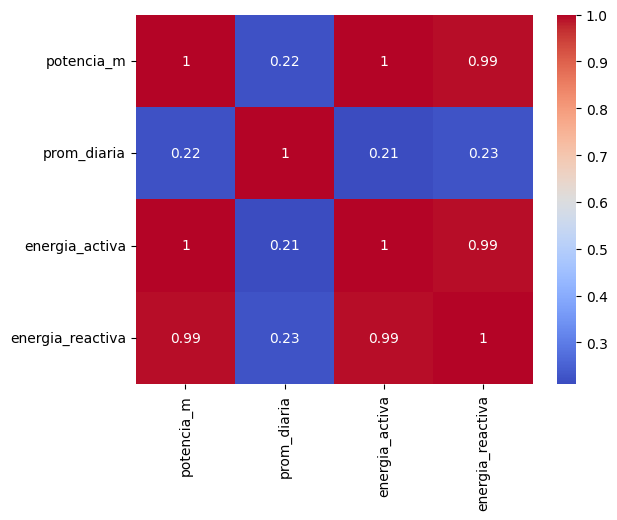

In [21]:
correlacion1 = df1[['potencia_m',  'prom_diaria', 'energia_activa',	'energia_reactiva']].corr()

sns.heatmap(correlacion1, annot=True, cmap='coolwarm')

* our world in data energy
[vínculo](https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv)




In [22]:
datos2 = pd.read_csv('https://raw.githubusercontent.com/owid/energy-data/refs/heads/master/owid-energy-data.csv')
datos2.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [23]:
datos2.shape

(21812, 130)

In [25]:
colombia = datos2['country'] == 'Colombia'
print(colombia)

0        False
1        False
2        False
3        False
4        False
         ...  
21807    False
21808    False
21809    False
21810    False
21811    False
Name: country, Length: 21812, dtype: bool


In [26]:
colombia.value_counts()

country
False    21688
True       124
Name: count, dtype: int64

In [27]:
datacolombia = datos2[datos2['country'] == 'Colombia']
datacolombia.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
4506,Colombia,1900,COL,4034733.0,4.353822e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4507,Colombia,1901,COL,4112556.0,4.413478e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4508,Colombia,1902,COL,4194368.0,4.486636e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4509,Colombia,1903,COL,4280293.0,4.548537e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4510,Colombia,1904,COL,4367979.0,4.620044e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
datacolombia.shape

(124, 130)

In [29]:
datacolombia.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=130)

In [30]:
datacolombia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 4506 to 4629
Columns: 130 entries, country to wind_share_energy
dtypes: float64(127), int64(1), object(2)
memory usage: 126.9+ KB


In [31]:
df2 = pd.DataFrame(
    {'anio': datacolombia['year'],
     'cons_bio_per': datacolombia['biofuel_elec_per_capita'],
     'cons_carb_per': datacolombia['coal_elec_per_capita'],
     'cons_gas_per': datacolombia['gas_elec_per_capita'],
     'cons_conb_per': datacolombia['oil_elec_per_capita'],
     'cons_solar_per': datacolombia['solar_energy_per_capita'],
     'cons_wind_per': datacolombia['wind_energy_per_capita'],
     'cons_hydro_per': datacolombia['hydro_elec_per_capita'],
     'cons_nuclear_per': datacolombia['nuclear_elec_per_capita'],
     'cons_other_per': datacolombia['other_renewables_elec_per_capita'],
     'cons_total_per': datacolombia['electricity_demand_per_capita']
    }
)
df2

,anio,cons_bio_per,cons_carb_per,cons_gas_per,cons_conb_per,cons_solar_per,cons_wind_per,cons_hydro_per,cons_nuclear_per,cons_other_per,cons_total_per
4506,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4507,1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4508,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4509,1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4510,1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4625,2019,31.283,161.993,262.217,54.795,6.936,3.326,1055.643,0.0,31.283,1575.893
4626,2020,42.214,183.976,298.249,52.032,9.839,0.522,951.097,0.0,42.214,1552.110
4627,2021,43.481,87.351,267.099,54.934,16.407,3.071,1178.262,0.0,43.481,1641.026
4628,2022,42.025,84.821,323.090,53.013,25.260,3.763,1132.166,0.0,42.025,1650.922


In [32]:
df2.shape

(124, 11)

In [33]:
df2.dtypes

anio                  int64
cons_bio_per        float64
cons_carb_per       float64
cons_gas_per        float64
cons_conb_per       float64
cons_solar_per      float64
cons_wind_per       float64
cons_hydro_per      float64
cons_nuclear_per    float64
cons_other_per      float64
cons_total_per      float64
dtype: object

In [34]:
df2.isnull().sum()

anio                  0
cons_bio_per        100
cons_carb_per       100
cons_gas_per        100
cons_conb_per       100
cons_solar_per       90
cons_wind_per        90
cons_hydro_per       65
cons_nuclear_per     65
cons_other_per       74
cons_total_per      100
dtype: int64

In [35]:
df2['cons_bio_per'].fillna(df2['cons_bio_per'].mean(), inplace=True)
df2['cons_carb_per'].fillna(df2['cons_carb_per'].mean(), inplace=True)
df2['cons_gas_per'].fillna(df2['cons_gas_per'].mean(), inplace=True)
df2['cons_conb_per'].fillna(df2['cons_conb_per'].mean(), inplace=True)
df2['cons_hydro_per'].fillna(df2['cons_hydro_per'].mean(), inplace=True)
df2['cons_solar_per'].fillna(df2['cons_solar_per'].mean(), inplace=True)
df2['cons_wind_per'].fillna(df2['cons_wind_per'].mean(), inplace=True)
df2['cons_nuclear_per'].fillna(df2['cons_nuclear_per'].mean(), inplace=True)
df2['cons_other_per'].fillna(df2['cons_other_per'].mean(), inplace=True)
df2['cons_total_per'].fillna(df2['cons_total_per'].mean(), inplace=True)

/tmp/ipykernel_60357/3639978983.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['cons_bio_per'].fillna(df2['cons_bio_per'].mean(), inplace=True)
/tmp/ipykernel_60357/3639978983.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [36]:
df2.isnull().sum()

anio                0
cons_bio_per        0
cons_carb_per       0
cons_gas_per        0
cons_conb_per       0
cons_solar_per      0
cons_wind_per       0
cons_hydro_per      0
cons_nuclear_per    0
cons_other_per      0
cons_total_per      0
dtype: int64

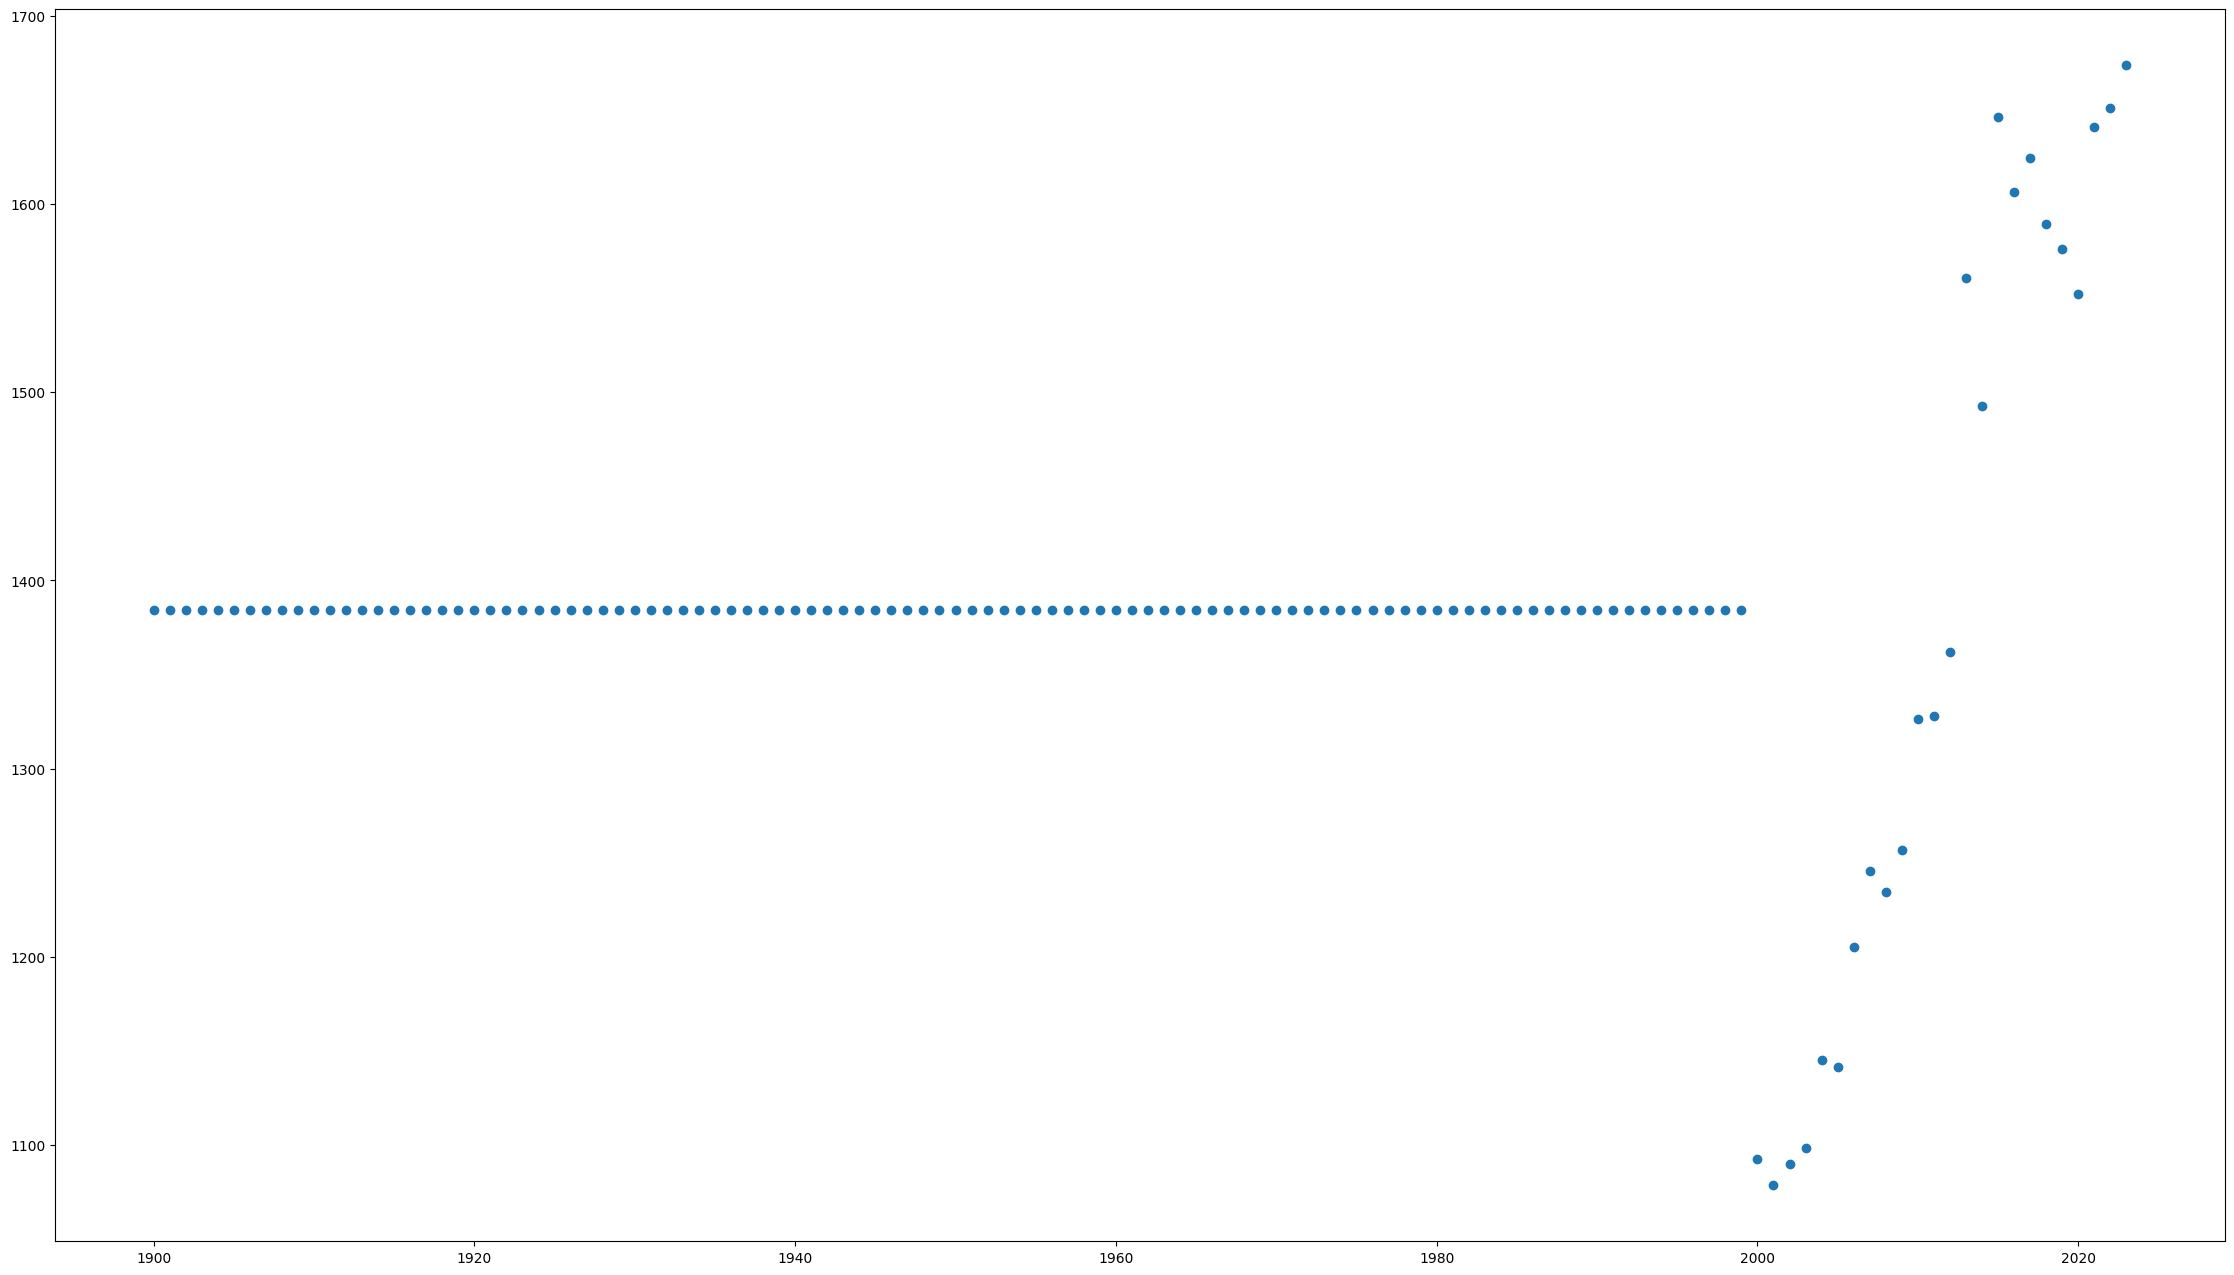

In [37]:
plt.figure(figsize=(28, 16))
plt.scatter(x='anio', y='cons_total_per', data=df2)

In [38]:
df_escalado2 = MinMaxScaler().fit_transform(df2)
df_escalado2

df2['cons_nuclear_per']

4506    0.0
4507    0.0
4508    0.0
4509    0.0
4510    0.0
       ... 
4625    0.0
4626    0.0
4627    0.0
4628    0.0
4629    0.0
Name: cons_nuclear_per, Length: 124, dtype: float64

* Meta FNCER: Incorporar en la matriz energética nueva capacidad instalada a partir de Fuentes No Convencionales de Energía Renovable - FNCER\
[vínculo](https://www.datos.gov.co/Minas-y-Energ-a/Meta-FNCER-Incorporar-en-la-matriz-energ-tica-nuev/vy9n-w6hc/about_data)

<Axes: >

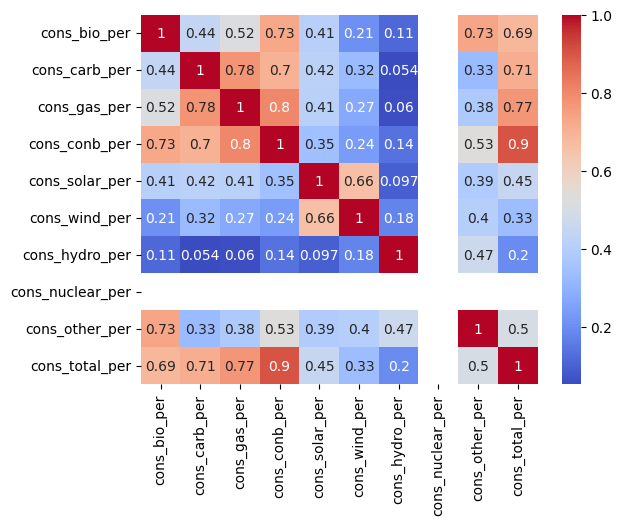

In [39]:
correlacion2 = df2[['cons_bio_per',	'cons_carb_per', 'cons_gas_per', 'cons_conb_per', 'cons_solar_per',	'cons_wind_per', 'cons_hydro_per', 'cons_nuclear_per', 'cons_other_per', 'cons_total_per']].corr()

sns.heatmap(correlacion2, annot=True, cmap='coolwarm')

In [40]:
results3 = client.get("vy9n-w6hc", limit=3000)

datos3 = pd.DataFrame.from_records(results3)
datos3.head()

,proyecto,tipo,capacidad,departamento,municipio,codigo_departamento,codigo_municipio,fecha_estimada_fpo,energia_kwh_d_a,usuarios,inversi_n_estimada_cop,empleos_estimados,emisiones_co2_ton_a_o
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.8,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
3,EL PASO SOLAR (ENEL GREEN POWER),Solar,67.0,CESAR,EL PASO,20,20250,2019-04-05T00:00:00.000,321600,55769,288100000000,466,93907
4,SOLAR CASTILLA ECP,Solar,20.0,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032


In [41]:
datos3['tipo'].describe()

count       158
unique        2
top       Solar
freq        145
Name: tipo, dtype: object

In [42]:
datos3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   proyecto                158 non-null    object
 1   tipo                    158 non-null    object
 2   capacidad               158 non-null    object
 3   departamento            158 non-null    object
 4   municipio               158 non-null    object
 5   codigo_departamento     158 non-null    object
 6   codigo_municipio        158 non-null    object
 7   fecha_estimada_fpo      158 non-null    object
 8   energia_kwh_d_a         158 non-null    object
 9   usuarios                158 non-null    object
 10  inversi_n_estimada_cop  158 non-null    object
 11  empleos_estimados       158 non-null    object
 12  emisiones_co2_ton_a_o   158 non-null    object
dtypes: object(13)
memory usage: 16.2+ KB


# 1) ¿Qué municipios son más aptos para desarrollar un proyecto de energías renovables?
# 2)  Cual es la probabilidad de que un municipio de colombia se desarrolle un proyectoe energia renovable?

## *ERRORES DATOS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!*







In [43]:
# Esta repitiendo 'energia_kwh_d_a'.
#'Empleos estimados' es relevante.
#'inversi_n_estimada_cop' tambien.
#'capacidad' tambien.
#Renombrar 'Energía_no_renovable', poco explicita, no tiene ralacion con 'emisiones_co2_ton_a_o'.

In [44]:
df3 = pd.DataFrame(
    {'Municipio': datos3['municipio'],
     'Departamento': datos3['departamento'],
     'Tipo': datos3['tipo'],
     'Usuarios': datos3['usuarios'],
     'Capacidad_instalada': datos3['energia_kwh_d_a'],
     'Energía_p': datos3['energia_kwh_d_a'],
     'Energía_no_renovable': datos3['emisiones_co2_ton_a_o']

    }
)


In [45]:
df3.shape

(158, 7)

In [46]:
df3.isnull().sum()

Municipio               0
Departamento            0
Tipo                    0
Usuarios                0
Capacidad_instalada     0
Energía_p               0
Energía_no_renovable    0
dtype: int64

In [47]:
df3.dtypes

Municipio               object
Departamento            object
Tipo                    object
Usuarios                object
Capacidad_instalada     object
Energía_p               object
Energía_no_renovable    object
dtype: object

In [48]:
for col in ['Usuarios', 'Capacidad_instalada', 'Energía_p', 'Energía_no_renovable']:
    df3[col] = pd.to_numeric(df3[col], errors='coerce')
df3

,Municipio,Departamento,Tipo,Usuarios,Capacidad_instalada,Energía_p,Energía_no_renovable
0,URIBIA,LA GUAJIRA,Eólico,30665,176832,176832,51635
1,YUMBO,VALLE DEL CAUCA,Solar,8157,47040,47040,13736
2,SANTA ROSA,BOLÍVAR,Solar,6709,38688,38688,11297
3,EL PASO,CESAR,Solar,55769,321600,321600,93907
4,CASTILLA LA NUEVA,META,Solar,16647,96000,96000,28032
...,...,...,...,...,...,...,...
153,"""""",VALLE DEL CAUCA,Solar,4944,28512,28512,8326
154,"""""",VALLE DEL CAUCA,Solar,3296,19008,19008,5550
155,BARRANCABERMEJA,SANTANDER,Solar,17480,100800,100800,29434
156,VILLAVICENCIO,META,Solar,1582,9120,9120,2663


In [49]:
df3.dtypes

Municipio               object
Departamento            object
Tipo                    object
Usuarios                 int64
Capacidad_instalada      int64
Energía_p                int64
Energía_no_renovable     int64
dtype: object

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78],
 [Text(0, 0, 'URIBIA'),
  Text(1, 0, 'YUMBO'),
  Text(2, 0, 'SANTA ROSA'),
  Text(3, 0, 'EL PASO'),
  Text(4, 0, 'CASTILLA LA NUEVA'),
  Text(5, 0, 'CALI'),
  Text(6, 0, 'SAN ANDRÉS'),
  Text(7, 0, 'SOLEDAD'),
  Text(8, 0, 'ESPINAL'),
  Text(9, 0, 'IBAGUÉ'),
  Text(10, 0, 'MEDELLÍN'),
  Text(11, 0, 'UNGUÍA'),
  Text(12, 0, 'PUERTO GAITÁN'),
  Text(13, 0, 'CARTAGENA DE INDIAS'),
  Text(14, 0, 'PEREIRA'),
  Text(15, 0, 'PLANETA RICA'),
  Text(16, 0, 'CANDELARIA'),
  Text(17, 0, 'RIONEGRO'),
  Text(18, 0, 'INÍRIDA'),
  Text(19, 0, '

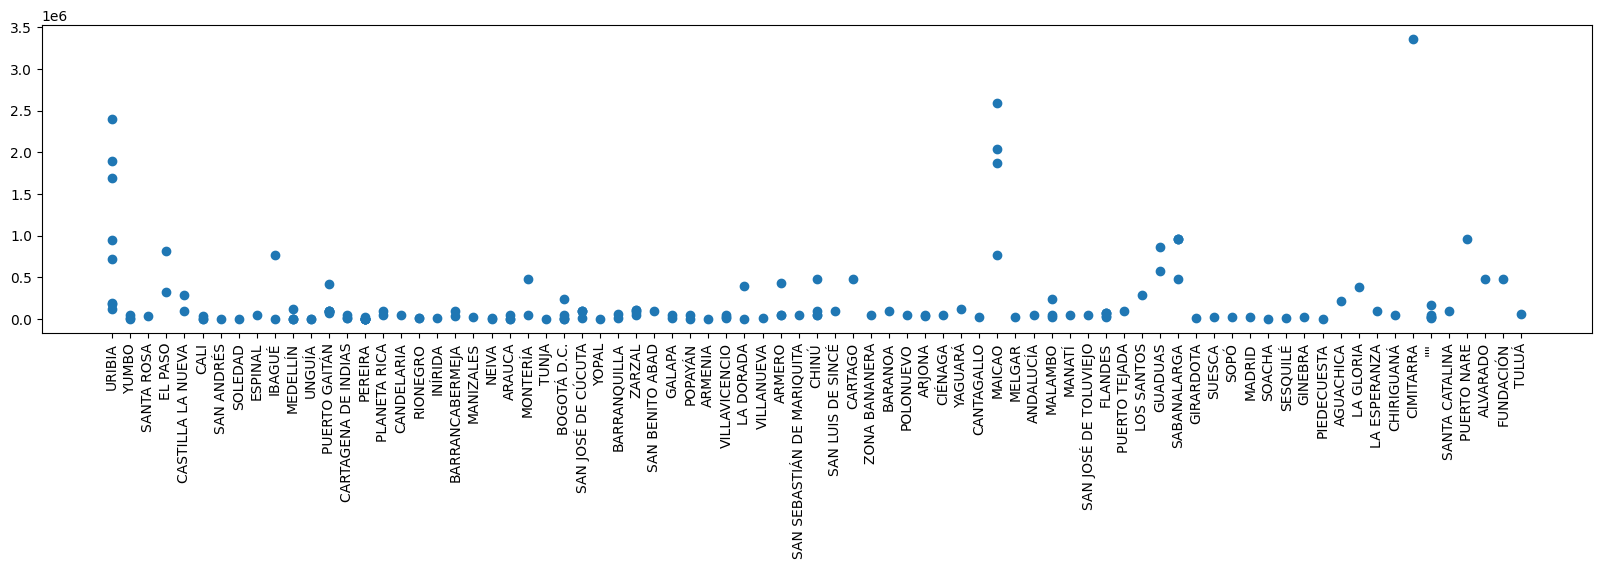

In [50]:
plt.figure(figsize=(20, 4))
plt.scatter(x='Municipio', y='Capacidad_instalada', data=df3)
plt.xticks(rotation=90)

<Axes: >

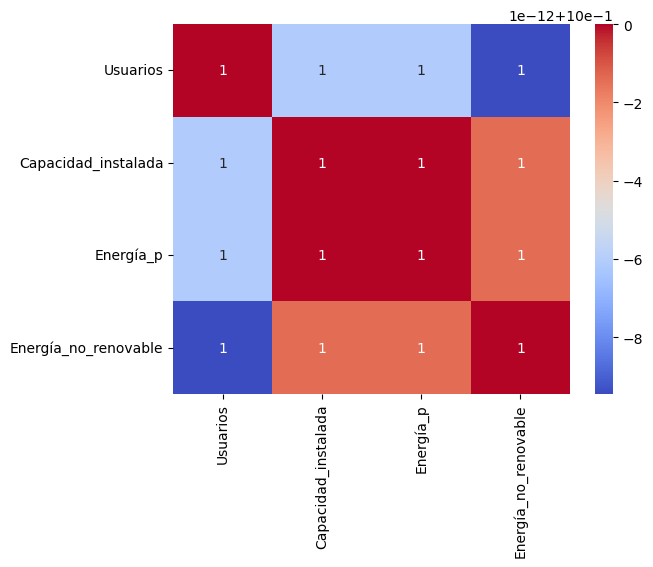

In [51]:
#correlcion
correlacion3 = df3[[ 'Usuarios', 'Capacidad_instalada',	'Energía_p', 'Energía_no_renovable']].corr()
sns.heatmap(correlacion3, annot=True, cmap='coolwarm')

In [52]:
# Unir df1 y df3
df_unificado = pd.merge(df1, df3, on='Municipio', how='left')
df_unificado.fillna(0, inplace=True)
df_unificado

,Municipio,anio,potencia_m,prom_diaria,energia_activa,energia_reactiva,Departamento,Tipo,Usuarios,Capacidad_instalada,Energía_p,Energía_no_renovable
0,PUERTO NARIÑO,2024,286.40,24.00,132215,41907.0,0,0,0.0,0.0,0.0,0.0
1,TARAPACA (ANM),2024,102.60,10.16,28132,12662.0,0,0,0.0,0.0,0.0,0.0
2,VIGÍA DEL FUERTE,2024,27.46,4.19,2686,1110.0,0,0,0.0,0.0,0.0,0.0
3,PROVIDENCIA,2024,2190.28,23.59,1331271,284638.0,0,0,0.0,0.0,0.0,0.0
4,CARTAGENA DE INDIAS,2024,247.59,10.90,64368,30561.0,BOLÍVAR,Solar,2497.0,14400.0,14400.0,4205.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4996,BUENAVENTURA,2024,31.23,10.05,7610,3285.0,0,0,0.0,0.0,0.0,0.0
4997,CARURÚ,2024,87.82,16.39,31775,7881.0,0,0,0.0,0.0,0.0,0.0
4998,MITÚ,2024,3236.71,23.56,1590470,387197.0,0,0,0.0,0.0,0.0,0.0
4999,TARAIRA,2024,136.84,13.01,39226,10719.0,0,0,0.0,0.0,0.0,0.0


In [53]:
df_unificado['Tipo'].value_counts()

Tipo
0         3794
Solar      847
Eólico     360
Name: count, dtype: int64

# ***Error ***

In [54]:
# No finciona # def Tipo_dummies(column):
    if column == 'Solar':
        return 1
    elif column == 'Eólico':
        return -1
    else:
        return 0

IndentationError: unexpected indent (2800254153.py, line 2)

In [55]:
df_unificado['#Tipo'] = df_unificado['Tipo'].apply(Tipo_dummies)
df_unificado['#Tipo'].value_counts()

NameError: name 'Tipo_dummies' is not defined

In [56]:
'''#ConVErtir a numerico
if 'Tipo' in df_unificado.columns:
    df_unificado = pd.get_dummies(df_unificado, columns=['Tipo'], dtype=float)
df_unificado'''

"#ConVErtir a numerico\nif 'Tipo' in df_unificado.columns:\n    df_unificado = pd.get_dummies(df_unificado, columns=['Tipo'], dtype=float)\ndf_unificado"

In [57]:
# escaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_features = ['potencia_m', 'prom_diaria', 'energia_activa', 'energia_reactiva', 'Usuarios', 'Capacidad_instalada', 'Energía_p', 'Energía_no_renovable']


scaler = MinMaxScaler()

df_unificado[numerical_features] = scaler.fit_transform(df_unificado[numerical_features])

In [58]:
df_unificado

,Municipio,anio,potencia_m,prom_diaria,energia_activa,energia_reactiva,Departamento,Tipo,Usuarios,Capacidad_instalada,Energía_p,Energía_no_renovable
0,PUERTO NARIÑO,2024,0.008395,0.047244,0.006412,0.007710,0,0,0.000,0.000,0.000,0.000
1,TARAPACA (ANM),2024,0.003008,0.020000,0.001364,0.002330,0,0,0.000,0.000,0.000,0.000
2,VIGÍA DEL FUERTE,2024,0.000805,0.008248,0.000130,0.000204,0,0,0.000,0.000,0.000,0.000
3,PROVIDENCIA,2024,0.064205,0.046437,0.064559,0.052369,0,0,0.000,0.000,0.000,0.000
4,CARTAGENA DE INDIAS,2024,0.007258,0.021457,0.003121,0.005623,BOLÍVAR,Solar,0.006,0.006,0.006,0.006
...,...,...,...,...,...,...,...,...,...,...,...,...
4996,BUENAVENTURA,2024,0.000915,0.019783,0.000369,0.000604,0,0,0.000,0.000,0.000,0.000
4997,CARURÚ,2024,0.002574,0.032264,0.001541,0.001450,0,0,0.000,0.000,0.000,0.000
4998,MITÚ,2024,0.094880,0.046378,0.077129,0.071239,0,0,0.000,0.000,0.000,0.000
4999,TARAIRA,2024,0.004011,0.025610,0.001902,0.001972,0,0,0.000,0.000,0.000,0.000


In [59]:
# Crear una nueva variable que represente la energía total generada
df_unificado['energia_total'] = df_unificado['energia_activa'] + df_unificado['energia_reactiva']


In [60]:
# Crear una nueva variable que represente la energía total generada
df_unificado['energia_total'] = df_unificado['energia_activa'] + df_unificado['energia_reactiva']

In [62]:
# Crear una variable que represente la eficiencia de la generación
df_unificado['eficiencia_generacion'] = df_unificado['energia_total'] / df_unificado['Capacidad_instalada']


In [63]:
# Crear una variable que represente la generación por usuario
df_unificado['generacion_usuario'] = df_unificado['energia_total'] / df_unificado['Usuarios']


In [64]:
# Crear una variable que represente la generación promedio por municipio
df_unificado['generacion_promedio_municipio'] = df_unificado.groupby('Municipio')['energia_total'].transform('mean')

# Crear una variable que represente la generación total anual por departamento
df_unificado['generacion_anual_departamento'] = df_unificado.groupby(['Departamento', 'anio'])['energia_total'].transform('sum')

In [65]:
df_unificado

,Municipio,anio,potencia_m,prom_diaria,energia_activa,energia_reactiva,Departamento,Tipo,Usuarios,Capacidad_instalada,Energía_p,Energía_no_renovable,energia_total,eficiencia_generacion,generacion_usuario,generacion_promedio_municipio,generacion_anual_departamento
0,PUERTO NARIÑO,2024,0.008395,0.047244,0.006412,0.007710,0,0,0.000,0.000,0.000,0.000,0.014122,inf,inf,0.012286,9.749556
1,TARAPACA (ANM),2024,0.003008,0.020000,0.001364,0.002330,0,0,0.000,0.000,0.000,0.000,0.003694,inf,inf,0.003575,9.749556
2,VIGÍA DEL FUERTE,2024,0.000805,0.008248,0.000130,0.000204,0,0,0.000,0.000,0.000,0.000,0.000334,inf,inf,0.002874,9.749556
3,PROVIDENCIA,2024,0.064205,0.046437,0.064559,0.052369,0,0,0.000,0.000,0.000,0.000,0.116929,inf,inf,0.105461,9.749556
4,CARTAGENA DE INDIAS,2024,0.007258,0.021457,0.003121,0.005623,BOLÍVAR,Solar,0.006,0.006,0.006,0.006,0.008744,1.457378,1.457442,0.002539,0.190984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,BUENAVENTURA,2024,0.000915,0.019783,0.000369,0.000604,0,0,0.000,0.000,0.000,0.000,0.000973,inf,inf,0.003391,9.749556
4997,CARURÚ,2024,0.002574,0.032264,0.001541,0.001450,0,0,0.000,0.000,0.000,0.000,0.002991,inf,inf,0.002233,9.749556
4998,MITÚ,2024,0.094880,0.046378,0.077129,0.071239,0,0,0.000,0.000,0.000,0.000,0.148368,inf,inf,0.134845,9.749556
4999,TARAIRA,2024,0.004011,0.025610,0.001902,0.001972,0,0,0.000,0.000,0.000,0.000,0.003874,inf,inf,0.003193,9.749556


<Axes: >

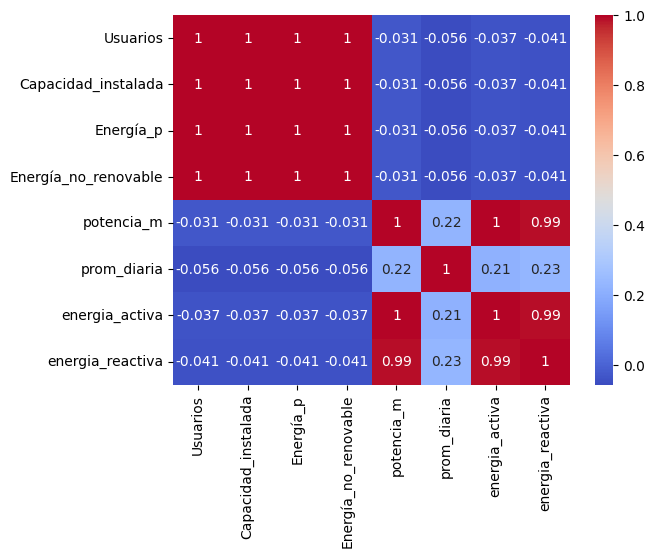

In [66]:
correlacionf = df_unificado[[ 'Usuarios', 'Capacidad_instalada',	'Energía_p', 'Energía_no_renovable',	'potencia_m',	'prom_diaria',	'energia_activa',	'energia_reactiva']].corr()
sns.heatmap(correlacionf, annot=True, cmap='coolwarm')

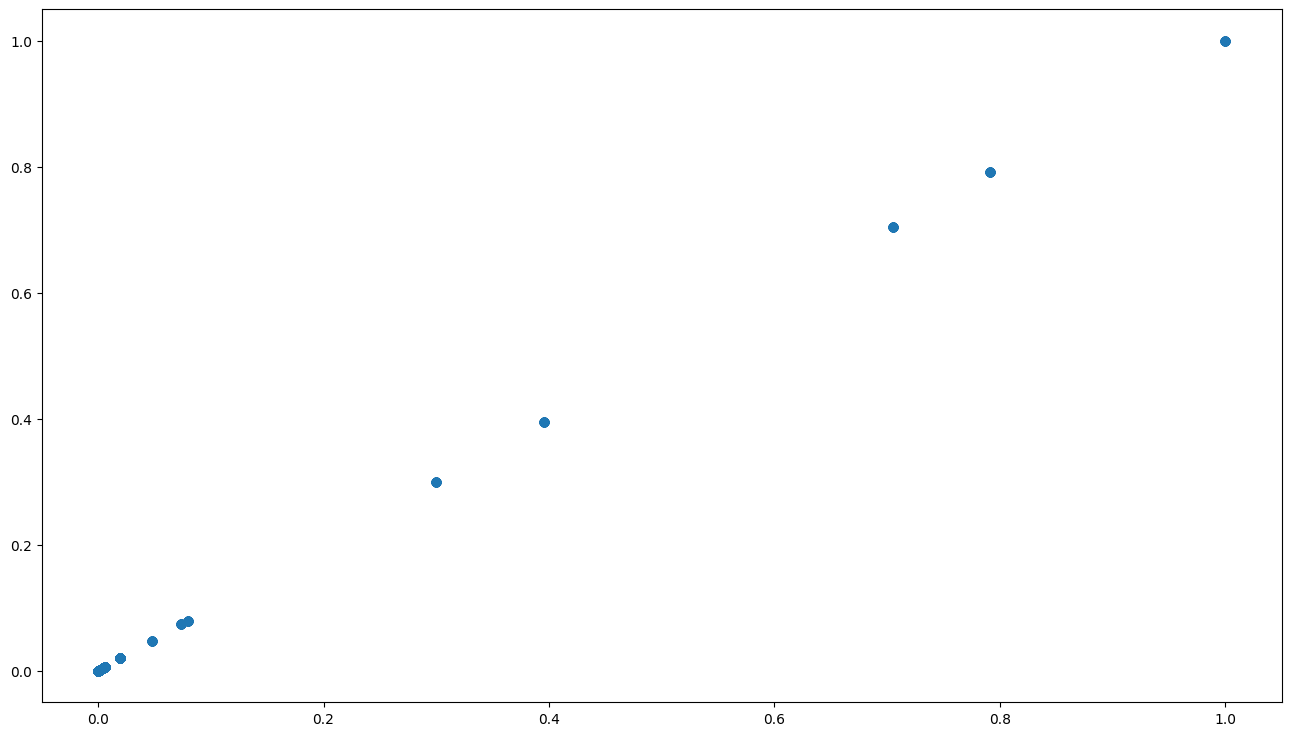

In [67]:
plt.figure(figsize=(16, 9))
plt.scatter(x='Usuarios', y='Capacidad_instalada', data=df_unificado)

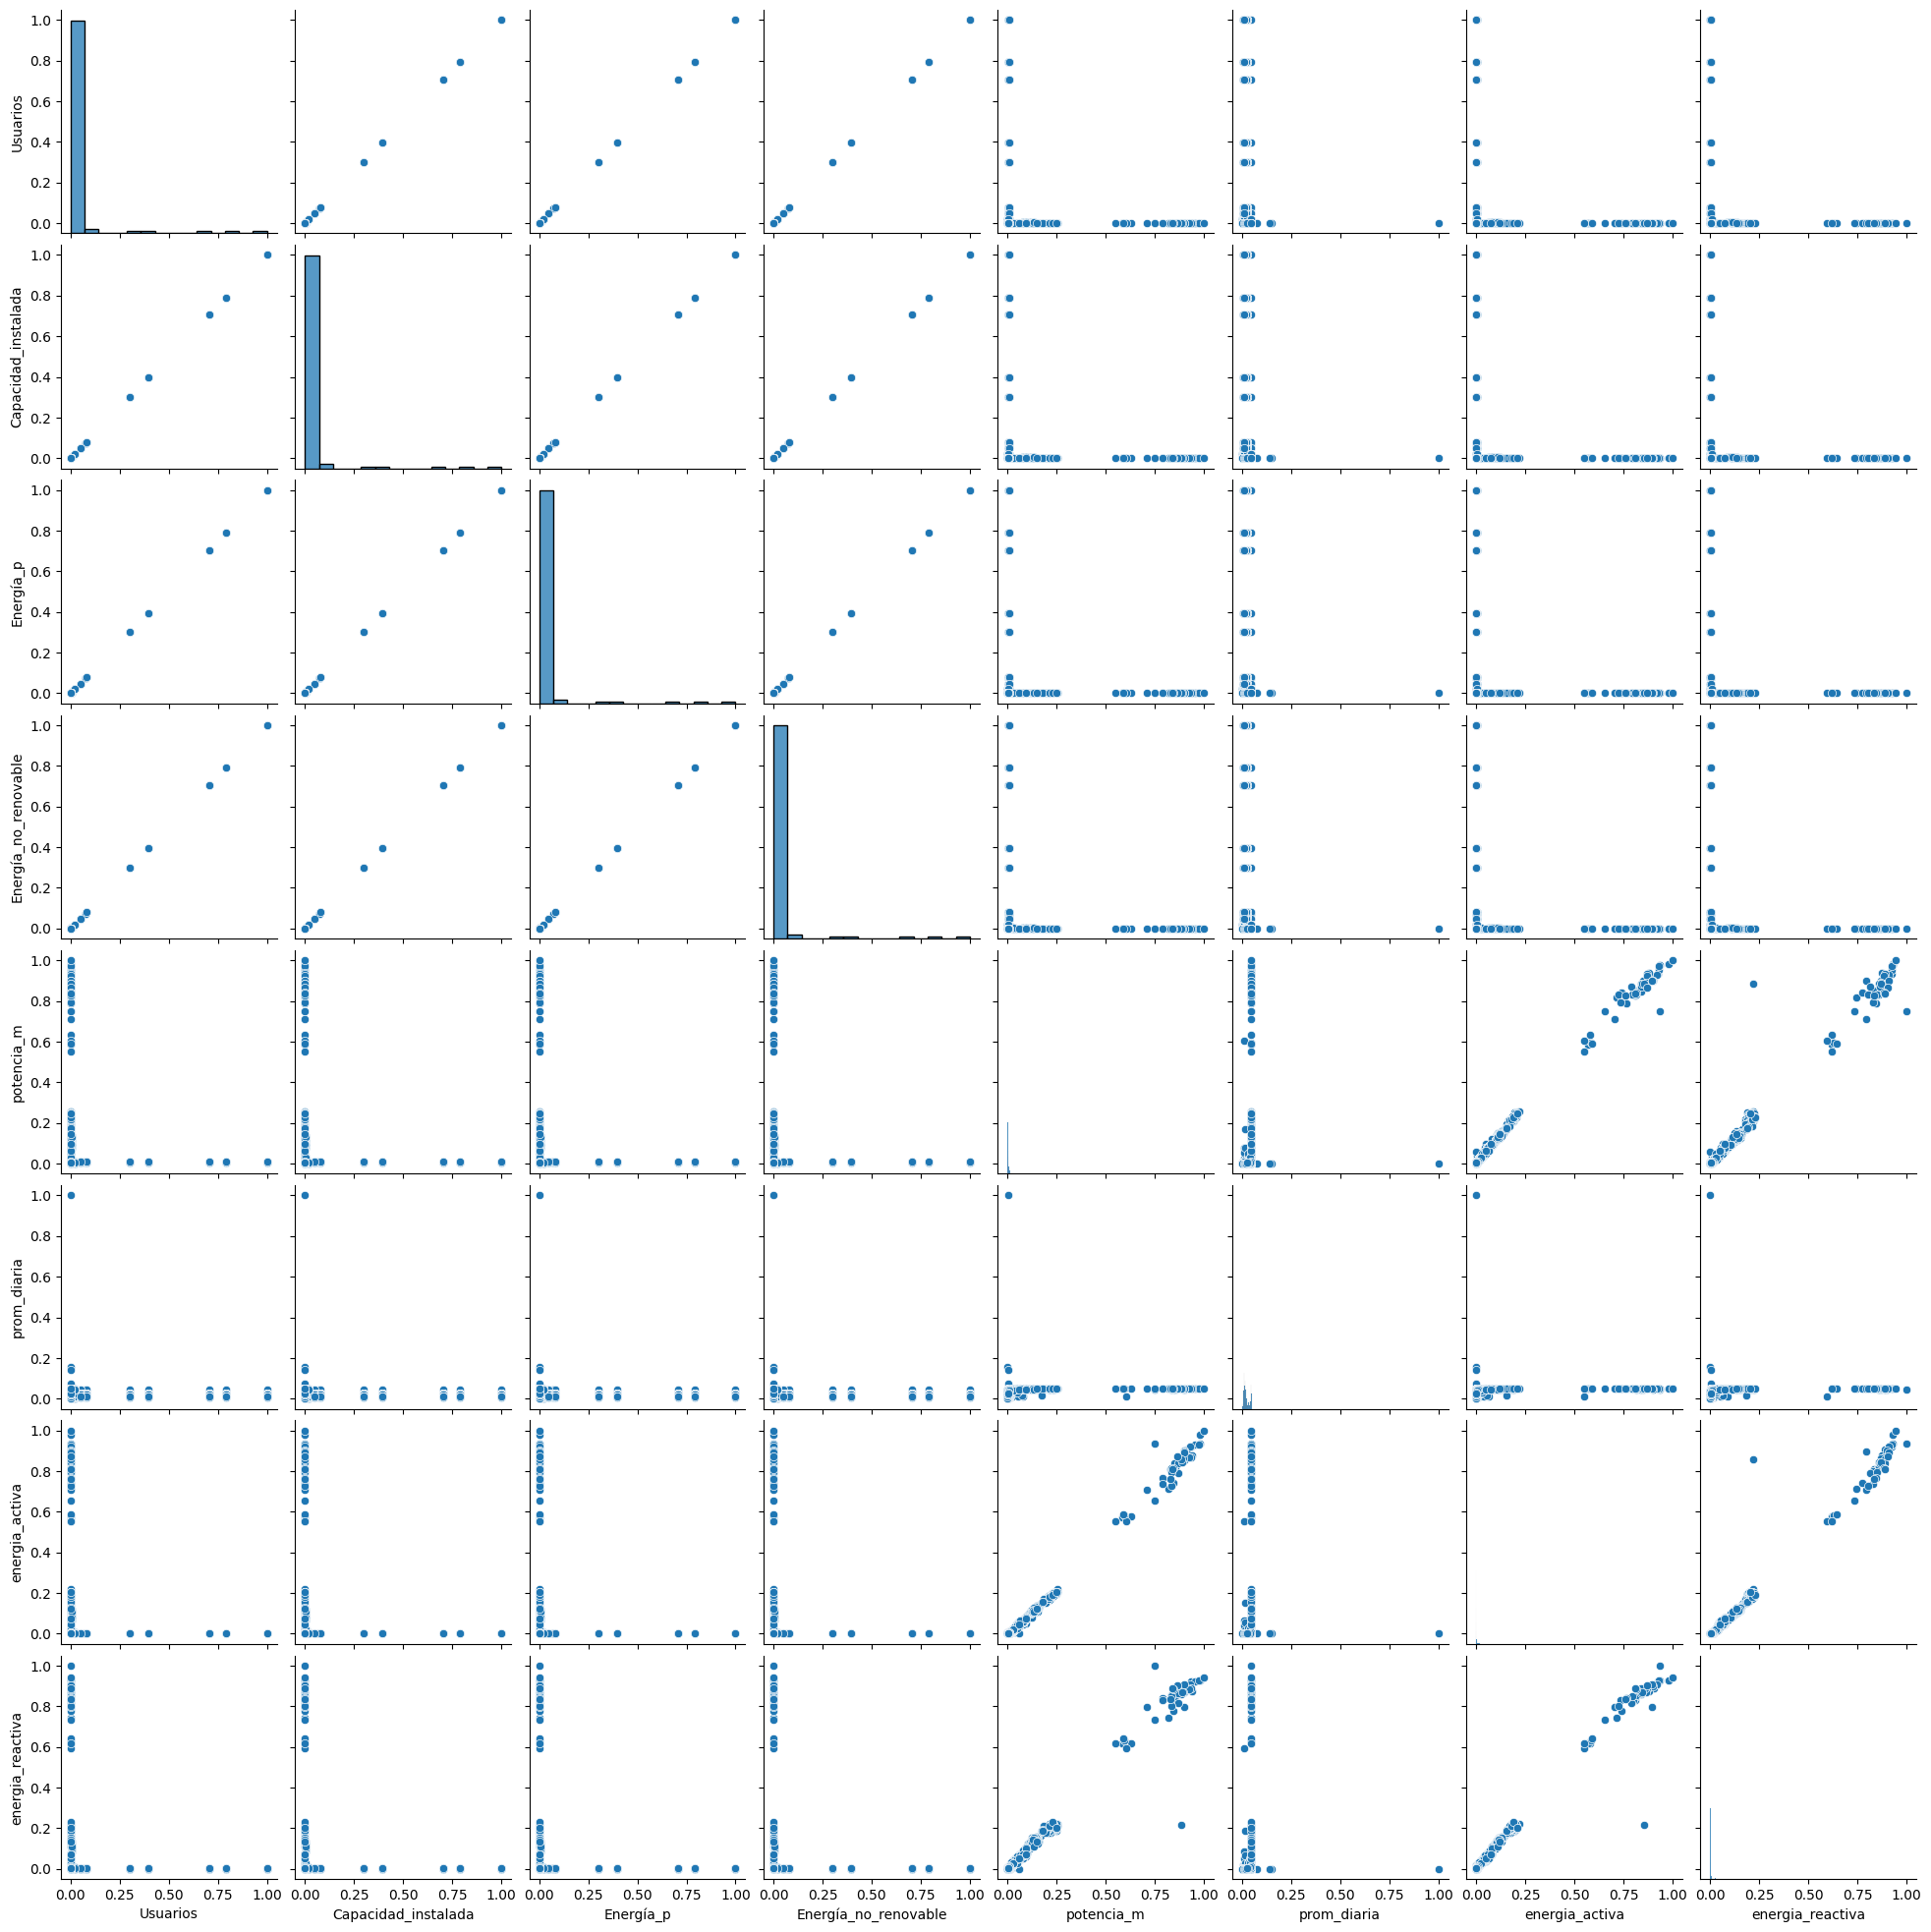

In [68]:
sns.pairplot(df_unificado[['Usuarios',	'Capacidad_instalada','Energía_p','Energía_no_renovable',	'potencia_m',	'prom_diaria','energia_activa',	'energia_reactiva']])

<Axes: >

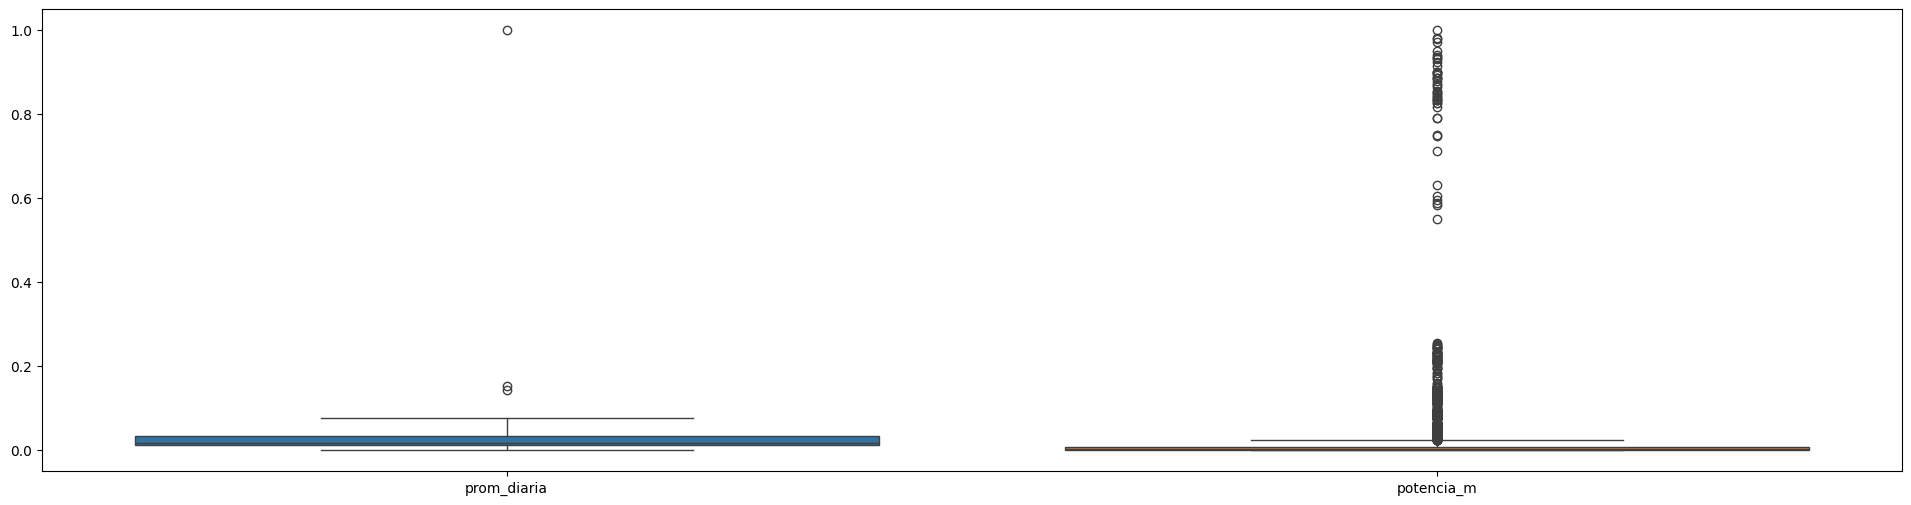

In [69]:
plt.figure(figsize=(24, 6))
bigotes = df_unificado[['prom_diaria', 'potencia_m']]
# Remove the 'kind' argument, as it's not needed for sns.boxplot
sns.boxplot(bigotes, whis=3)

In [71]:
df_unificado.dtypes

Municipio                         object
anio                               int64
potencia_m                       float64
prom_diaria                      float64
energia_activa                   float64
energia_reactiva                 float64
Departamento                      object
Tipo                              object
Usuarios                         float64
Capacidad_instalada              float64
Energía_p                        float64
Energía_no_renovable             float64
energia_total                    float64
eficiencia_generacion            float64
generacion_usuario               float64
generacion_promedio_municipio    float64
generacion_anual_departamento    float64
dtype: object

In [72]:
df_unificado.isnull().sum()

Municipio                         0
anio                              0
potencia_m                        0
prom_diaria                       0
energia_activa                    0
energia_reactiva                  0
Departamento                      0
Tipo                              0
Usuarios                          0
Capacidad_instalada               0
Energía_p                         0
Energía_no_renovable              0
energia_total                     0
eficiencia_generacion            39
generacion_usuario               39
generacion_promedio_municipio     0
generacion_anual_departamento     0
dtype: int64

In [73]:
df_unificado.shape

(5001, 17)

<Axes: >

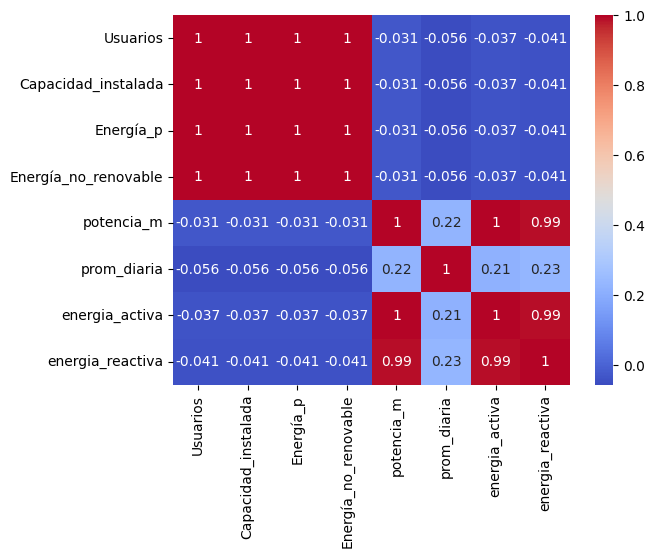

In [74]:
#correlcion
correlacion3 = df_unificado[[	'Usuarios',	'Capacidad_instalada','Energía_p','Energía_no_renovable',	'potencia_m',	'prom_diaria','energia_activa',	'energia_reactiva']].corr()
sns.heatmap(correlacion3, annot=True, cmap='coolwarm')


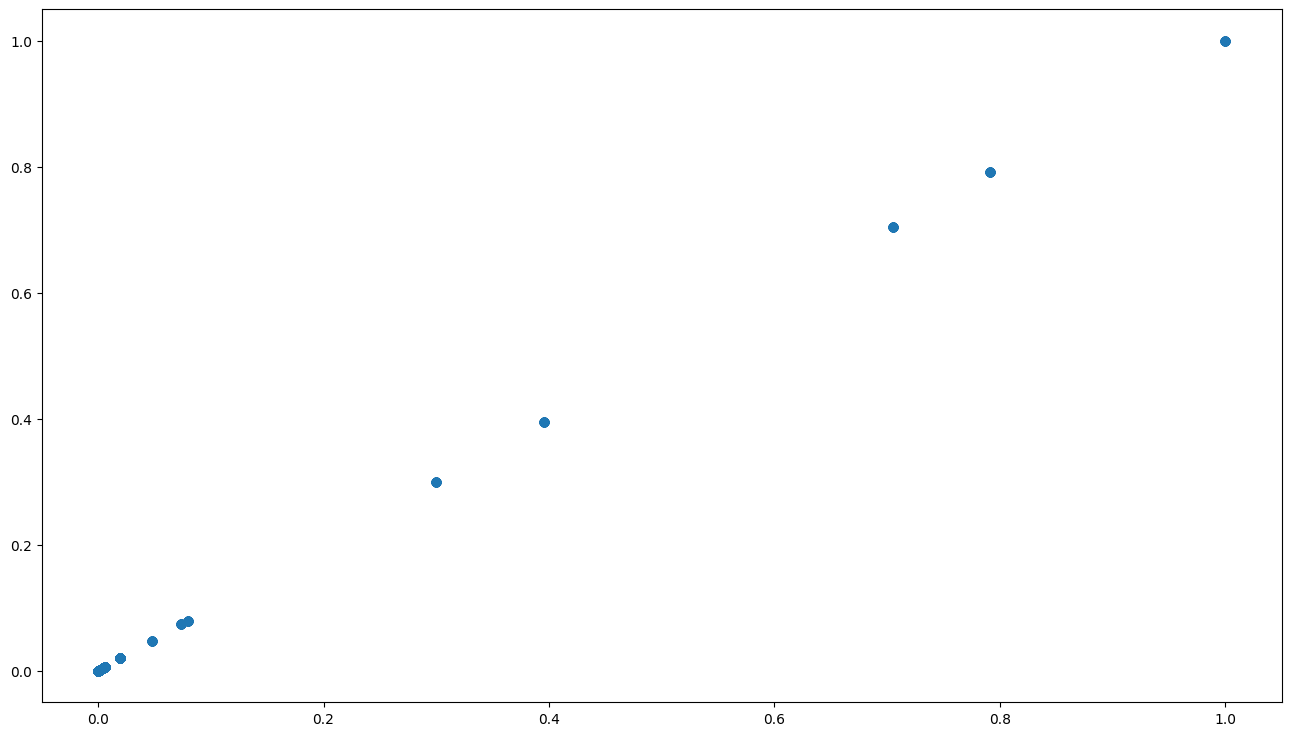

In [75]:
plt.figure(figsize=(16, 9))
plt.scatter(x='Usuarios', y='Capacidad_instalada', data=df_unificado)

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np


# Create dummy variables for the 'Tipo' column
X = pd.get_dummies(df_unificado[['potencia_m', 'Capacidad_instalada', 'Tipo']],
        columns=['Tipo'],
        drop_first=True) # To avoid multicollinearity

y = df_unificado['potencial_renovable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo1 = RandomForestClassifier()
modelo1.fit(X_train, y_train)

# Evaluar el modelo
y_pred = modelo1.predict(X_test)

KeyError: 'potencial_renovable'

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(modelo1, X, y, cv=kfold)
print(classification_report(y_test, y_pred))
print(cross_val_scores)
print(cross_val_scores.mean())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1001

    accuracy                           1.00      1001
   macro avg       1.00      1.00      1.00      1001
weighted avg       1.00      1.00      1.00      1001

[1. 1. 1. 1. 1.]
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


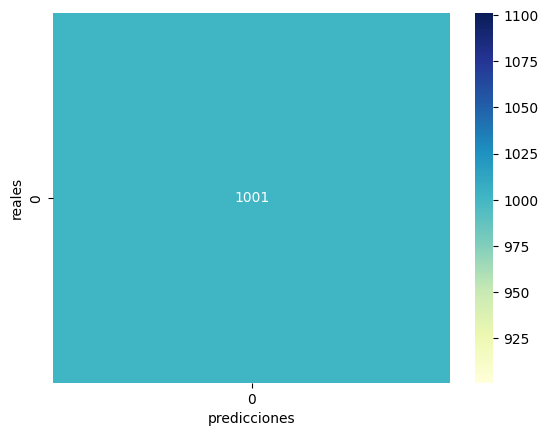

In [ ]:
cm = confusion_matrix(y_test, y_pred)
labels = ['solar', 'eolico']
#cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(cm, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('predicciones')
plt.ylabel('reales')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1001]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


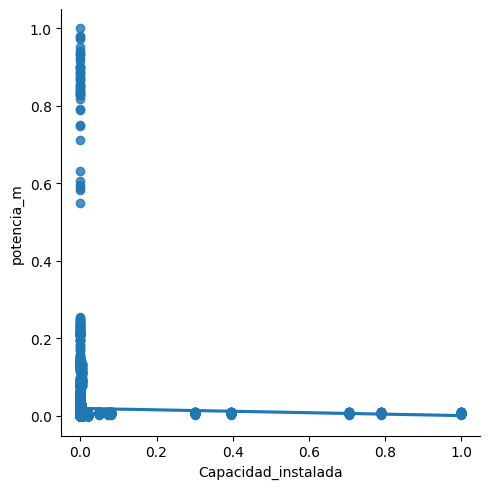

In [ ]:
sns.lmplot(data=df_unificado, x='Capacidad_instalada', y='potencia_m')

<Axes: >

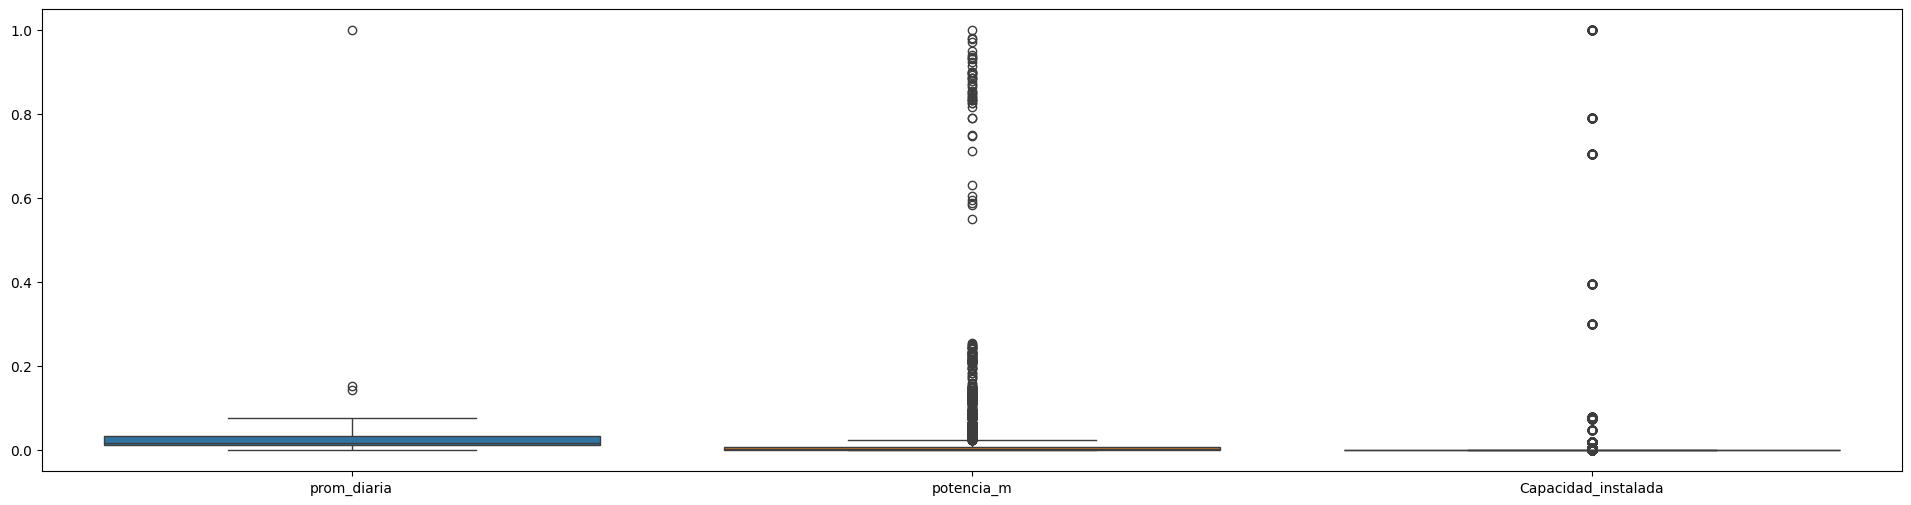

In [ ]:
plt.figure(figsize=(24, 6))
datos = df_unificado[['prom_diaria', 'potencia_m', 'Capacidad_instalada']]

sns.boxplot(datos, whis=3)

<ipython-input-78-c71b057eacb2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_unificado['Capacidad_instalada'])


<Axes: xlabel='Capacidad_instalada', ylabel='Density'>

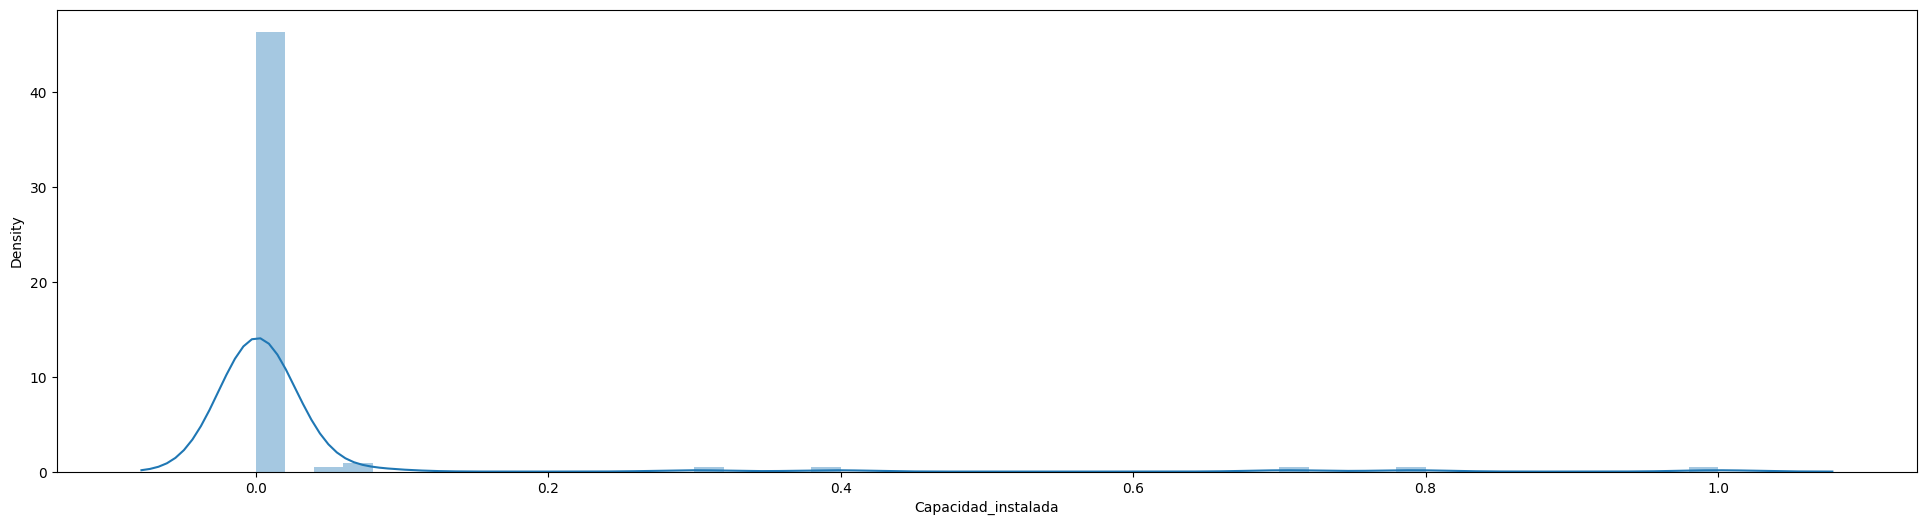

In [ ]:
plt.figure(figsize=(24, 6))
sns.distplot(df_unificado['Capacidad_instalada'])
#

In [ ]:
from scipy.stats.mstats import winsorize

potencia_winsorized = df_unificado['potencia_m'].copy()
y = winsorize(potencia_winsorized, limits=[0.05, 0.05])

Capacidad_winsorized = df_unificado['Capacidad_instalada'].copy()
z = winsorize(potencia_winsorized, limits=[0.05, 0.05])

diaria_winsorized = df_unificado['prom_diaria'].copy()
u = winsorize(potencia_winsorized, limits=[0.05, 0.05])

<Axes: >

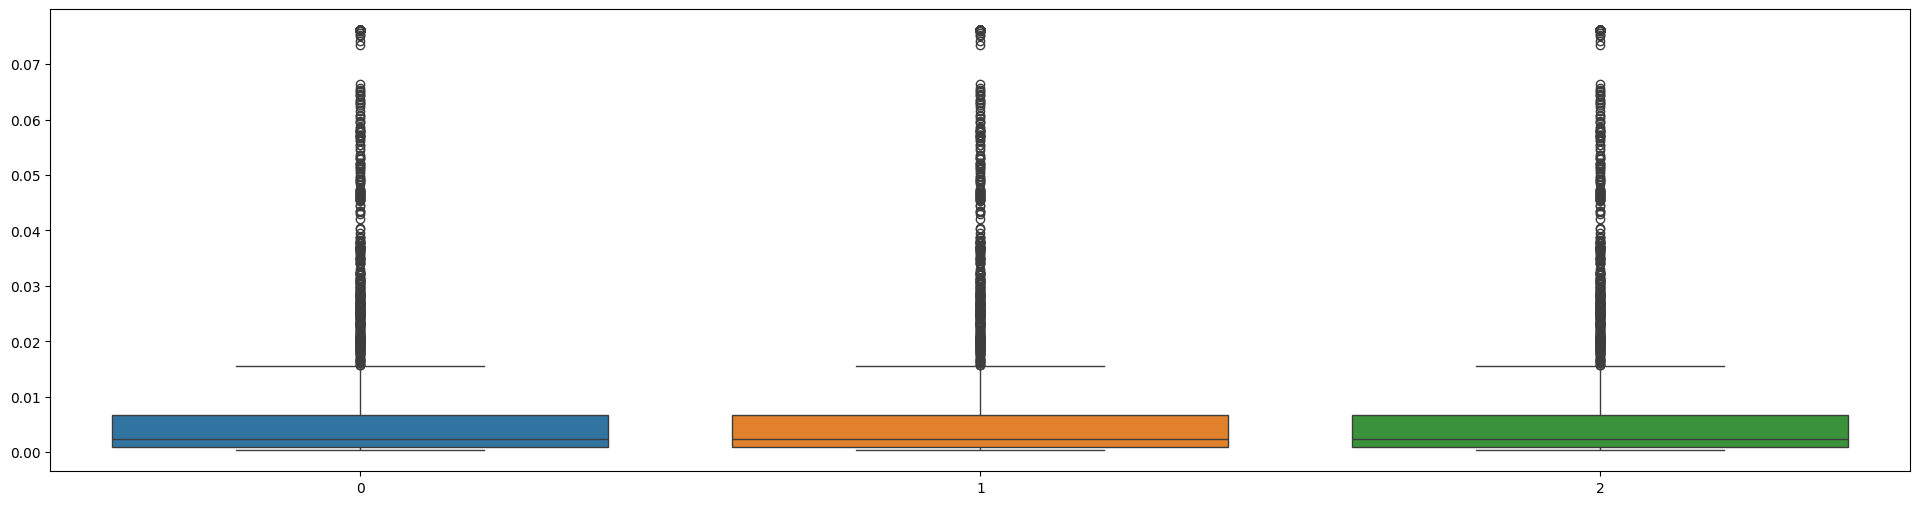

In [ ]:
plt.figure(figsize=(24, 6))
w = y, z, u
sns.boxplot(w)

In [ ]:
#Regresion logistica
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np

X = pd.get_dummies(df_unificado[['potencia_m', 'Capacidad_instalada', 'Tipo']],
                   columns=['Tipo'],
                   drop_first=True) # To avoid multicollinearity

y = df_unificado['potencial_renovable']

# Check the unique values in your target variable
print(y.unique())


if len(y.unique()) > 1:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    modelo2 = LogisticRegression()
    modelo2.fit(X_train, y_train)

    # Evaluar el modelo
    y_pred = modelo2.predict(X_test)

[0]


In [ ]:
#Regresion logistica
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import cross_val_score

accuracy_score = accuracy_score(y_test, y_pred)
reporte_score = classification_report(y_test, y_pred)

In [ ]:
print(accuracy_score, reporte_score)

1.0               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1001

    accuracy                           1.00      1001
   macro avg       1.00      1.00      1.00      1001
weighted avg       1.00      1.00      1.00      1001



In [ ]:
cm = confusion_matrix(y_test, y_pred)
labels = ['solar', 'eolico']
#cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(cm, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('predicciones')
plt.ylabel('reales')
plt.show()

In [ ]:
df_unificado

,Municipio,anio,potencia_m,prom_diaria,energia_activa,energia_reactiva,Departamento,Tipo,Usuarios,Capacidad_instalada,Energía_p,Energía_no_renovable,#Tipo,energia_total,eficiencia_generacion,generacion_usuario,generacion_promedio_municipio,generacion_anual_departamento,potencial_renovable
0,PUERTO NARIÑO,2024,0.008395,0.047244,0.006412,0.007710,0,0,0.000,0.000,0.000,0.000,0,0.014122,inf,inf,0.012286,9.749556,0
1,TARAPACA (ANM),2024,0.003008,0.020000,0.001364,0.002330,0,0,0.000,0.000,0.000,0.000,0,0.003694,inf,inf,0.003575,9.749556,0
2,VIGÍA DEL FUERTE,2024,0.000805,0.008248,0.000130,0.000204,0,0,0.000,0.000,0.000,0.000,0,0.000334,inf,inf,0.002874,9.749556,0
3,PROVIDENCIA,2024,0.064205,0.046437,0.064559,0.052369,0,0,0.000,0.000,0.000,0.000,0,0.116929,inf,inf,0.105461,9.749556,0
4,CARTAGENA DE INDIAS,2024,0.007258,0.021457,0.003121,0.005623,BOLÍVAR,Solar,0.006,0.006,0.006,0.006,1,0.008744,1.457378,1.457442,0.002539,0.190984,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,BUENAVENTURA,2024,0.000915,0.019783,0.000369,0.000604,0,0,0.000,0.000,0.000,0.000,0,0.000973,inf,inf,0.003391,9.749556,0
4997,CARURÚ,2024,0.002574,0.032264,0.001541,0.001450,0,0,0.000,0.000,0.000,0.000,0,0.002991,inf,inf,0.002233,9.749556,0
4998,MITÚ,2024,0.094880,0.046378,0.077129,0.071239,0,0,0.000,0.000,0.000,0.000,0,0.148368,inf,inf,0.134845,9.749556,0
4999,TARAIRA,2024,0.004011,0.025610,0.001902,0.001972,0,0,0.000,0.000,0.000,0.000,0,0.003874,inf,inf,0.003193,9.749556,0


<Axes: >

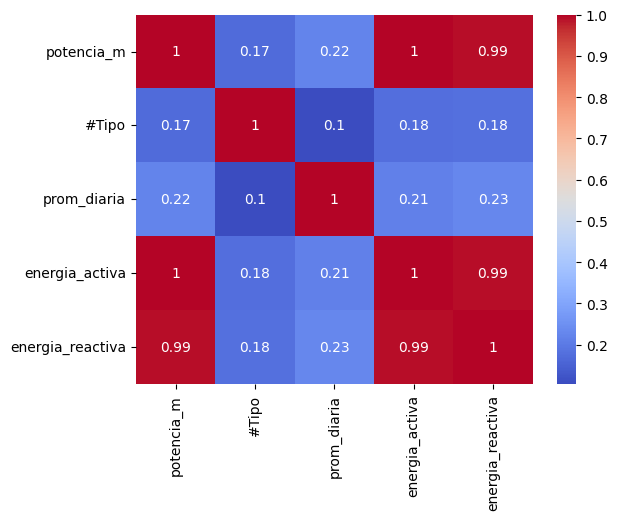

In [ ]:
#correlcion
corro= df_unificado[['potencia_m', '#Tipo',	'prom_diaria','energia_activa',	'energia_reactiva']].corr()
sns.heatmap(corro, annot=True, cmap='coolwarm')

**Modelo Naive Bayes**

La clasificación de este modelo usa los datos de Capacidad instalada, promedio diario, usuarios y promedio diario, para predecir si puede haber un proyecto de energía renovable y de qué tipo sería

In [ ]:
#MODELO NAIVE BAYES (Gaussiano)
Xn = df_unificado[['potencia_m', 'Capacidad_instalada', 'Usuarios', 'prom_diaria']] #Datos relacionados
yn = df_unificado['#Tipo'] #Objetivo


Xn_ent, Xn_prue, yn_ent, yn_prue = train_test_split(Xn, yn, test_size=0.2, random_state=42)

#Modelo
naive_model = GaussianNB()
naive_model.fit(Xn_ent, yn_ent)
yn_pred = naive_model.predict(Xn_prue)


#Evaluación del modelo
print(classification_report(yn_prue, yn_pred))
print('Accuracy:', accuracy_score(yn_prue, yn_pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        81
           0       1.00      1.00      1.00       744
           1       1.00      1.00      1.00       176

    accuracy                           1.00      1001
   macro avg       1.00      1.00      1.00      1001
weighted avg       1.00      1.00      1.00      1001

Accuracy: 1.0


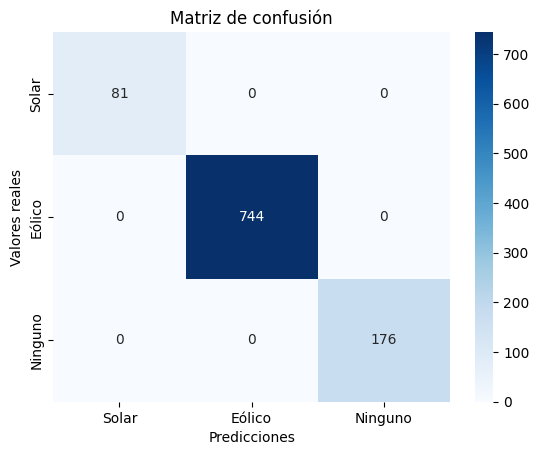

In [ ]:
#VISUALIZACIÓN CON MATRÍZ DE CONFUSIÓN
con_ma = confusion_matrix(yn_prue, yn_pred)
labels = ['Solar', 'Eólico', 'Ninguno']

sns.heatmap(con_ma, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()